In [86]:
import pandas as pd
path ="ecommerce_customer_churn_dataset.csv"
data =pd.read_csv(path)
pd.set_option("display.max_rows",None)


In [87]:
from sklearn.preprocessing import LabelEncoder

for col in data.select_dtypes(include="object"):
    le =LabelEncoder()
    data[col] = le.fit_transform(data[col])

# print(data.head(5))    

<Figure size 500x3500 with 0 Axes>

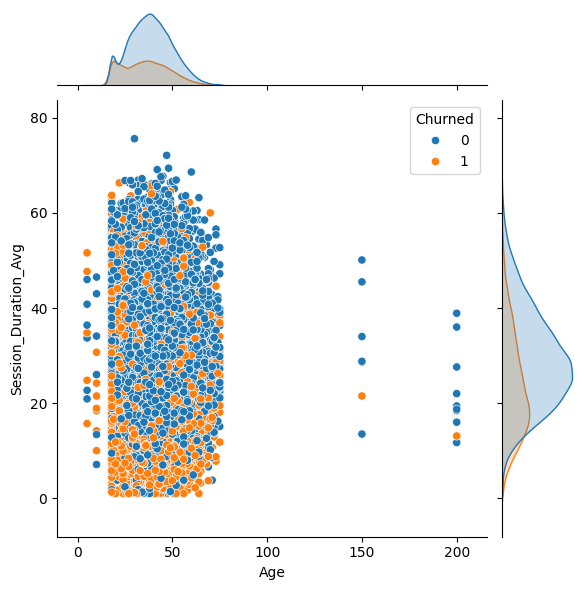

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,35))
sns.jointplot(data=data,y="Session_Duration_Avg",x ="Age",hue ="Churned")
plt.show()

<Figure size 1000x500 with 0 Axes>

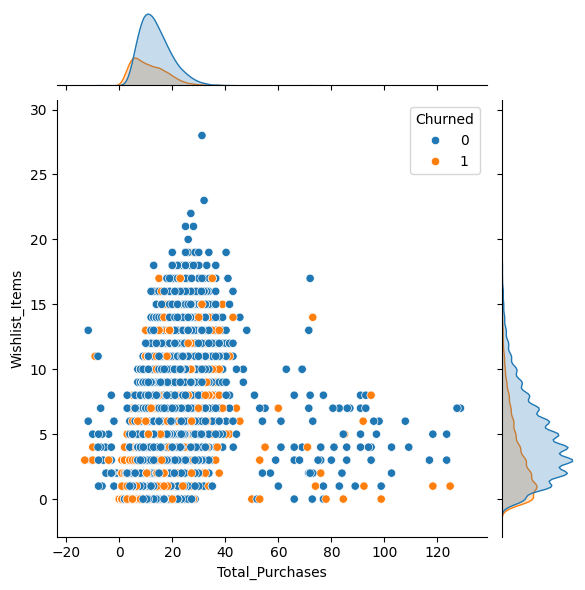

In [79]:
plt.figure(figsize=(10,5))
sns.jointplot(data=data,y="Wishlist_Items",x ="Total_Purchases",hue ="Churned")
plt.show()

<Figure size 1000x500 with 0 Axes>

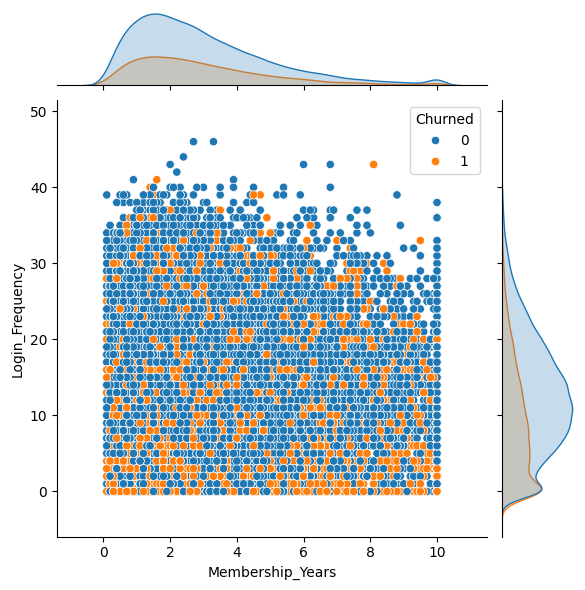

In [80]:
plt.figure(figsize=(10,5))
sns.jointplot(data=data,y="Login_Frequency",x ="Membership_Years",hue ="Churned")
plt.show()

In [89]:
print(data.isnull().sum())
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Session_Duration_Avg"] = data["Session_Duration_Avg"].fillna(data["Session_Duration_Avg"].median())
data["Pages_Per_Session"] = data["Pages_Per_Session"].fillna(data["Pages_Per_Session"].median())
data["Wishlist_Items"] = data["Wishlist_Items"].fillna(0)
data["Days_Since_Last_Purchase"] = data["Days_Since_Last_Purchase"].fillna(data["Days_Since_Last_Purchase"].max())
data["Returns_Rate"] = data["Returns_Rate"].fillna(data["Returns_Rate"].median())
data["Email_Open_Rate"] = data["Email_Open_Rate"].fillna(0)
data["Discount_Usage_Rate"] = data["Discount_Usage_Rate"].fillna(0)
data["Customer_Service_Calls"] = data["Customer_Service_Calls"].fillna(0)
data["Product_Reviews_Written"] = data["Product_Reviews_Written"].fillna(data["Product_Reviews_Written"].median())
data["Social_Media_Engagement_Score"] = data["Social_Media_Engagement_Score"].fillna(data["Social_Media_Engagement_Score"].median())
data["Mobile_App_Usage"] = data["Mobile_App_Usage"].fillna(data["Mobile_App_Usage"].median())
data["Payment_Method_Diversity"] = data["Payment_Method_Diversity"].fillna(0)
data["Credit_Balance"] = data["Credit_Balance"].fillna(data["Credit_Balance"].median())




Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64


In [90]:
corr = data.corr()["Churned"].sort_values(ascending=True)
print(corr)

Pages_Per_Session               -0.224708
Email_Open_Rate                 -0.223034
Session_Duration_Avg            -0.219512
Mobile_App_Usage                -0.211376
Login_Frequency                 -0.204379
Social_Media_Engagement_Score   -0.179829
Wishlist_Items                  -0.177308
Product_Reviews_Written         -0.174459
Total_Purchases                 -0.160029
Credit_Balance                  -0.147990
Age                             -0.100511
Discount_Usage_Rate             -0.058823
Signup_Quarter                  -0.011453
Lifetime_Value                  -0.010684
Country                         -0.001024
City                            -0.000774
Membership_Years                -0.000623
Gender                           0.000307
Payment_Method_Diversity         0.006198
Average_Order_Value              0.042288
Returns_Rate                     0.051122
Days_Since_Last_Purchase         0.066226
Cart_Abandonment_Rate            0.277963
Customer_Service_Calls           0

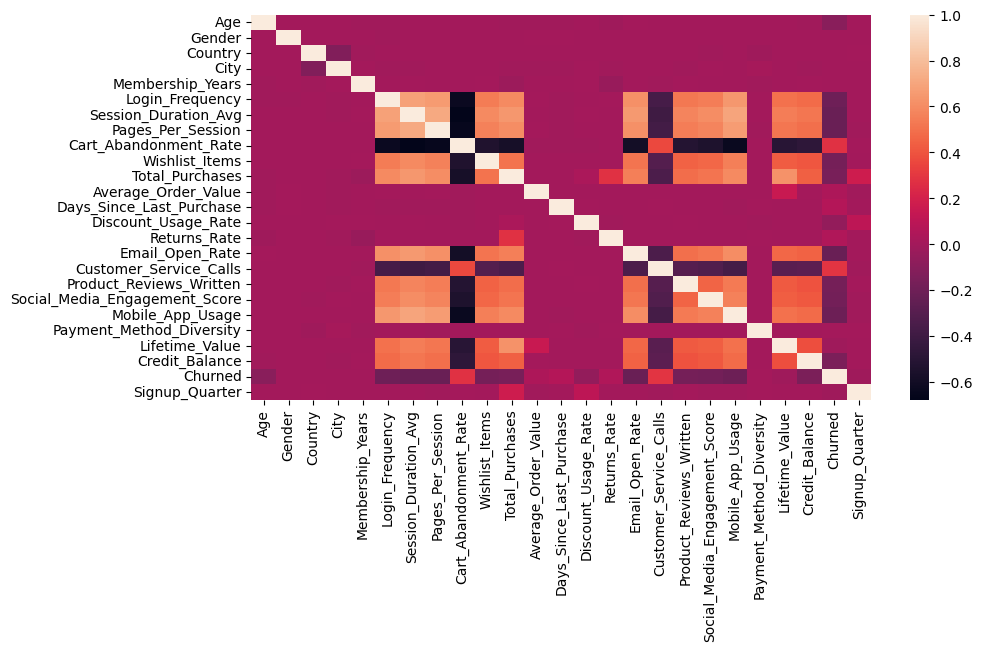

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr())
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score


In [ ]:
drop = [
    'Gender',
    'Membership_Years',
    'City',
    'Country',
    'Churned'
]

    # 'Age',
    # 'Wishlist_Items',
    # 'Session_Duration_Avg',
    # 'Lifetime_Value',
    # 'Login_Frequency',
    # 'Email_Open_Rate',
    # 'Credit_Balance',
    # 'Membership_Years',
    # 'City',
    # 'Returns_Rate',
    # 'Payment_Method_Diversity',
    # 'Product_Reviews_Written',
    # 'Country',
    # 'Days_Since_Last_Purchase',
    # 'Cart_Abandonment_Rate',
    # 'Discount_Usage_Rate',
    # 'Total_Purchases',
    # 'Signup_Quarter'
    
X =data.drop(columns=drop,errors='ignore')
# X =data.drop(columns="Churned")

y= data["Churned"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF =RandomForestClassifier(n_estimators=300)
RF.fit(X_train,y_train)

prediction = RF.predict(X_test)

print(classification_report(y_pred=prediction,y_true=y_test))

from sklearn.model_selection import cross_val_score

cv = cross_val_score(RF,X,y,cv =5)
print(cv)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7130
           1       0.91      0.77      0.84      2870

    accuracy                           0.91     10000
   macro avg       0.91      0.87      0.89     10000
weighted avg       0.91      0.91      0.91     10000



KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,                    
    scoring='f1_macro',      
    n_jobs=-1,                
    verbose=2
)

grid_search.fit(X_train,y_train)
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 